# Higher Diploma in Science in Computing - Data Analytics

## Principles of Data Analytics - Project Palmer Penguins

**Author: Rodrigo De Martino Ucedo**
******

# Palmer Penguins

*****

![Penguins](lter_penguins.png)

### Imports
***

In [284]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Graphic manipulation.

import seaborn as sns

# Numerical arrays.
import numpy as np

### Load Data

***

In [285]:
# Load the Penguins data set.
df = pd.read_csv("rawpalmerpenguinsdata.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Inspect Data

***

In [286]:
# The first 5 rows of the data set.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [287]:
# The last 5 rows of the data set.
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [288]:
# Informations of the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [289]:
# Count the number of null.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [290]:
# Inspect.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [291]:
# Descibe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [292]:
# Describe the object of the data set.
df.describe(include=[object])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [293]:
# Count the number of penguins of each specie.
df.value_counts(['species'])

species  
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [294]:
# Count the number of penguins of each island.
df.value_counts(['species', 'island'])

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Name: count, dtype: int64

In [295]:
# Correlation of the data set.
df.corr(method='pearson', numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [296]:
# Correlation between Flipper Length and Body Mass.
corrFLBM = df['flipper_length_mm'].corr(df['body_mass_g'])
print("Correlation between Flipper Length and Body Mass is:", corrFLBM)

Correlation between Flipper Length and Body Mass is: 0.8712017673060112


### Data Visualisation - Bar Chart
***

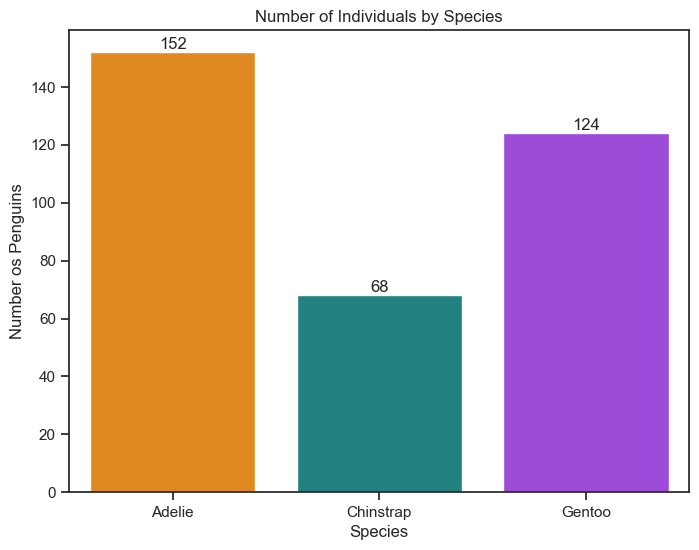

In [297]:
# Add figure size.
plt.figure(figsize = (8,6))
# Count the number of penguins for each specie.
ax = sns.countplot(x='species', data=df, palette=['#FF8C00','#159090','#A034F0'])
# Add title.
plt.title('Number of Individuals by Species')
# Add labels (X and Y).
plt.xlabel('Species')
plt.ylabel('Number os Penguins')
# Add total count on top of bar.
for container in ax.containers:
    ax.bar_label(container)

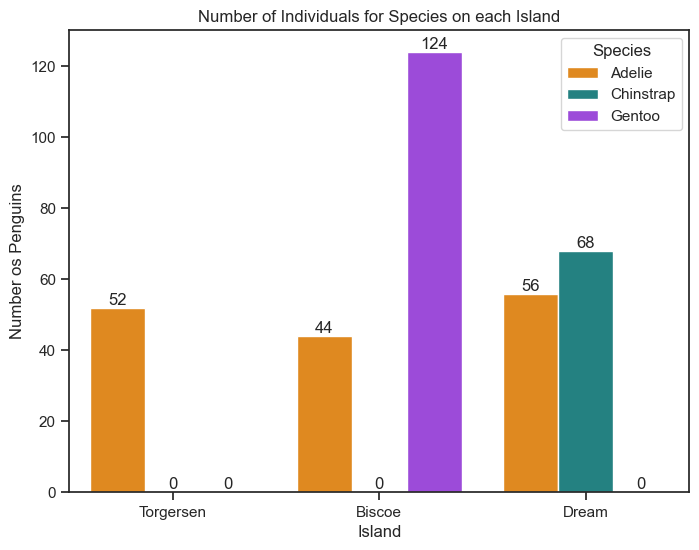

In [298]:
# Add figure size.
plt.figure(figsize = (8,6))
# Count the number of penguins for specie on each island.
ax = sns.countplot(x='island', hue='species', data=df, palette=['#FF8C00','#159090','#A034F0'])
# Add title.
plt.title('Number of Individuals for Species on each Island')
# Add legend tittle.
plt.legend(title='Species')
# Add labels (X and Y).
plt.xlabel('Island')
plt.ylabel('Number os Penguins')
# Add total count on top of bar.
for container in ax.containers:
    ax.bar_label(container)

### Data Visualisation - Histogram
***

Text(0, 0.5, 'Body Mass (g)')

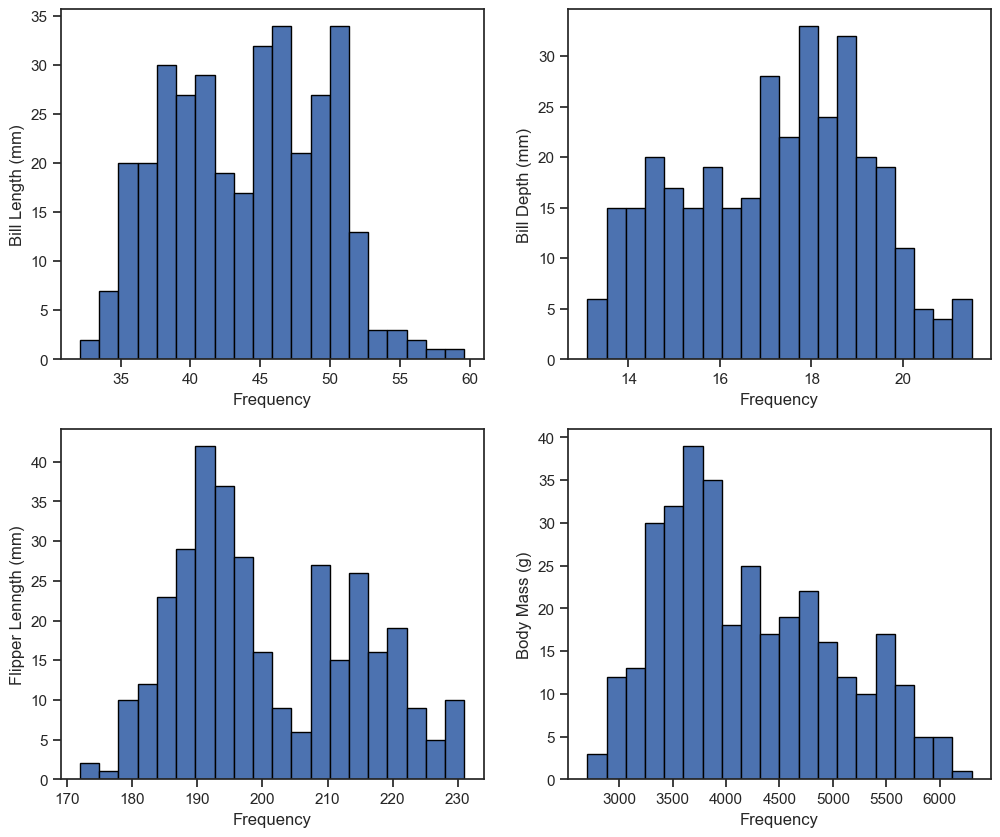

In [299]:
# Histogram of Palmer Penguins.
blength = df['bill_length_mm']
bdepth = df['bill_depth_mm']
flength = df['flipper_length_mm']
bmass = df['body_mass_g']
# Add figure size.
plt.figure(figsize = (12,10))
# Subplot position.
plt.subplot(2,2,1)
plt.hist(blength, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Bill Length (mm)')
# Subplot position.
plt.subplot(2,2,2)
plt.hist(bdepth, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Bill Depth (mm)')
# Subplot position.
plt.subplot(2,2,3)
plt.hist(flength, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Flipper Lenngth (mm)')
# Subplot position.
plt.subplot(2,2,4)
plt.hist(bmass, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Body Mass (g)')

### Data Visualisation - Best Fit Line

***

In [304]:
# Get just the bill depth.
blen= df['bill_length_mm'].dropna()
# Show
blen

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 342, dtype: float64

In [305]:
# Get just the flipper length
bmass = df['body_mass_g'].dropna()
# Show
bmass

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64

In [306]:
#Fit a straight line between x and y.
m, c = np.polyfit(blen, bmass, 1)
# Show m and C.
m, c

(87.4152770528756, 362.30672165392207)

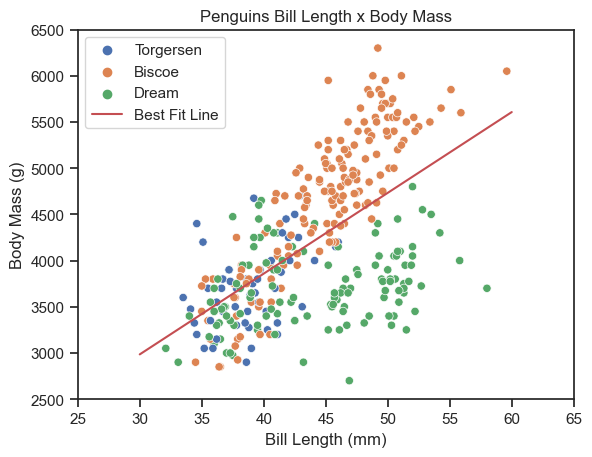

In [319]:
# x values for best fit line.
bf_x = np.linspace (30, 60, 100)
# y values for best fit line.
bf_y = m * bf_x + c

# Create a new figure and set of axes.
fig, ax = plt.subplots()
# Sample plot with islands categorization.
sns.scatterplot(data=df, x=blen, y=bmass, hue='island', ax=ax)
# Plot the best fit line.
ax.plot(bf_x, bf_y, 'r-', label='Best Fit Line')
# Axis labels.
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')
# Title.
ax.set_title('Penguins Bill Length x Body Mass')
# X Limits.
ax.set_xlim(25, 65)
# Y Limits.
ax.set_ylim(2500, 6500)
# Show the legend.
ax.legend()
# Show the plot.
plt.show()

*****
#### End
last commit on 31/04/2024